In [43]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing

In [44]:
#ucitavamo skupove podataka
data = pd.read_csv('NBA Regular Season Results 2013-2014.csv')
print (data.dtypes)
data1 = pd.read_csv('NBA Regular Season Results 2013-2014.csv')
data2 = pd.read_csv('NBA Regular Season Results 2016-2017.csv')
data3 = pd.read_csv('NBA Regular Season Results 2014-2015.csv')
data4 = pd.read_csv('NBA Regular Season Results 2015-2016.csv')

Date               object
Start (ET)         object
Visitor/Neutral    object
PTS                 int64
Home/Neutral       object
PTS.1               int64
Unnamed: 6         object
Unnamed: 7         object
Attend.             int64
Notes              object
dtype: object


In [45]:
#preimenujemo atribute  i brisemo nepotrebne
def changeColumns(dataset):
    dataset.columns = ['Date', 'Start (ET)', 'Visitor Team', 'Visitor PTS', 'Home Team', 'Home PTS', 'Box Score', 
              'OT', 'Attendance', 'Notes']
    return dataset

In [46]:
#tokom godina nba ekipe mogu da promene imena, ova funkcija ce dodeliti svim timovima ime koje im odgovora trenutno

def changeTeamName(data, indicator = True):
    
    for ind, row in data.iterrows():
        if indicator:
            homeTeam = row['Home Team']
            visitorTeam = row['Visitor Team']
            if homeTeam == 'New Orleans Hornets':
                homeTeam = 'New Orleans Pelicans'
            if visitorTeam == 'New Orleans Hornets':
                visitorTeam = 'New Orleans Pelicans'
            if homeTeam == 'Charlotte Bobcats':
                homeTeam = 'Charlotte Hornets'
            if visitorTeam == 'Charlotte Bobcats':
                visitorTeam = 'Charlotte Hornets'
            if homeTeam == 'New Jersey Nets':
                homeTeam = 'Brooklyn Nets'
            if visitorTeam == 'New Jersey Nets':
                visitorTeam = 'Brooklyn Nets'
            data.at[ind, 'Home Team'] =  homeTeam
            data.at[ind, 'Visitor Team'] = visitorTeam
            
        else:
            team = row['Team']
            if team == 'New Orleans Hornets':
                team = 'New Orleans Pelicans'
            if team == 'Charlotte Bobcats':
                team = 'Charlotte Hornets'
            if team == 'New Jersey Nets':
                team = 'Brooklyn Nets'
            data.at[ind, 'Team'] =  team
    return data

In [47]:
data1 = changeColumns(data1)
data2 = changeColumns(data2)
data3 = changeColumns(data3)
data4 = changeColumns(data4)

In [48]:
data1 = changeTeamName(data1)
data2 = changeTeamName(data2)
data3 = changeTeamName(data3)
data4 = changeTeamName(data4)
print(data2[ : 50])
print(data4[ : 50])

               Date Start (ET)            Visitor Team  Visitor PTS  \
0   Tue Oct 25 2016    7:30 pm         New York Knicks           88   
1   Tue Oct 25 2016   10:30 pm       San Antonio Spurs          129   
2   Tue Oct 25 2016   10:00 pm               Utah Jazz          104   
3   Wed Oct 26 2016    7:30 pm           Brooklyn Nets          117   
4   Wed Oct 26 2016    7:00 pm        Dallas Mavericks          121   
5   Wed Oct 26 2016   10:30 pm         Houston Rockets          114   
6   Wed Oct 26 2016    8:00 pm  Minnesota Timberwolves           98   
7   Wed Oct 26 2016    8:00 pm       Charlotte Hornets          107   
8   Wed Oct 26 2016    8:00 pm          Denver Nuggets          107   
9   Wed Oct 26 2016    7:00 pm              Miami Heat          108   
10  Wed Oct 26 2016    8:00 pm   Oklahoma City Thunder          103   
11  Wed Oct 26 2016   10:00 pm        Sacramento Kings          113   
12  Wed Oct 26 2016    7:30 pm         Detroit Pistons           91   
13  Th

In [49]:
#pravimo funkciju koja dodaje atribut 'winning streak' koji oznacava broj uzastopnih pobeda tima do tog meca.
def addWinningStreak(dataset):
    dataset['Visitor Winning Streak'] = 0
    dataset['Home Winning Streak'] = 0
    winStreak = {}
    for ind, row in dataset.iterrows():
        homeTeam = row['Home Team']
        visitorTeam = row['Visitor Team']
        if not visitorTeam in winStreak:
            winStreak[visitorTeam] = 0
        if not homeTeam in winStreak:
            winStreak[homeTeam] = 0
        dataset.at[ind, 'Visitor Winning Streak'] = winStreak[visitorTeam]
        dataset.at[ind, 'Home Winning Streak'] = winStreak[homeTeam]
        if row['Home Win']:
            winStreak[homeTeam] += 1
            winStreak[visitorTeam] = 0
        else:
            winStreak[homeTeam] = 0
            winStreak[visitorTeam] +=1

    return dataset

In [50]:
#kreiramo novi atribut koji oznacava da li je pobednik domaci tim. 
data1['Home Win'] = data1['Home PTS'] > data1['Visitor PTS']
data2['Home Win'] = data2['Home PTS'] > data2['Visitor PTS']
data3['Home Win'] = data3['Home PTS'] > data3['Visitor PTS']
data4['Home Win'] = data4['Home PTS'] > data4['Visitor PTS']

print (data1.head())
print (data2.head())
print (data3.head())
print (data4.head())

              Date Start (ET)          Visitor Team  Visitor PTS  \
0  Tue Oct 29 2013    7:00 pm         Orlando Magic           87   
1  Tue Oct 29 2013   10:30 pm  Los Angeles Clippers          103   
2  Tue Oct 29 2013    8:00 pm         Chicago Bulls           95   
3  Wed Oct 30 2013    7:00 pm         Brooklyn Nets           94   
4  Wed Oct 30 2013    8:30 pm         Atlanta Hawks          109   

             Home Team  Home PTS  Box Score   OT  Attendance Notes  Home Win  
0       Indiana Pacers        97  Box Score  NaN       18165   NaN      True  
1   Los Angeles Lakers       116  Box Score  NaN       18997   NaN      True  
2           Miami Heat       107  Box Score  NaN       19964   NaN      True  
3  Cleveland Cavaliers        98  Box Score  NaN       20562   NaN      True  
4     Dallas Mavericks       118  Box Score  NaN       19834   NaN      True  
              Date Start (ET)       Visitor Team  Visitor PTS  \
0  Tue Oct 25 2016    7:30 pm    New York Knicks    

In [51]:
data1 = addWinningStreak(data1)
data2 = addWinningStreak(data2)
data3 = addWinningStreak(data3)
data4 = addWinningStreak(data4)
data1[ : 50]


,Date,Start (ET),Visitor Team,Visitor PTS,Home Team,Home PTS,Box Score,OT,Attendance,Notes,Home Win,Visitor Winning Streak,Home Winning Streak
0,Tue Oct 29 2013,7:00 pm,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,18165,NaN,True,0,0
1,Tue Oct 29 2013,10:30 pm,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,18997,NaN,True,0,0
2,Tue Oct 29 2013,8:00 pm,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,19964,NaN,True,0,0
3,Wed Oct 30 2013,7:00 pm,Brooklyn Nets,94,Cleveland Cavaliers,98,Box Score,NaN,20562,NaN,True,0,0
4,Wed Oct 30 2013,8:30 pm,Atlanta Hawks,109,Dallas Mavericks,118,Box Score,NaN,19834,NaN,True,0,0
5,Wed Oct 30 2013,7:30 pm,Washington Wizards,102,Detroit Pistons,113,Box Score,NaN,19258,NaN,True,0,0
6,Wed Oct 30 2013,10:30 pm,Los Angeles Lakers,94,Golden State Warriors,125,Box Score,NaN,19596,NaN,True,1,0
7,Wed Oct 30 2013,8:00 pm,Charlotte Hornets,83,Houston Rockets,96,Box Score,NaN,18083,NaN,True,0,0
8,Wed Oct 30 2013,8:00 pm,Orlando Magic,115,Minnesota Timberwolves,120,Box Score,OT,17988,NaN,True,0,0
9,Wed Oct 30 2013,8:00 pm,Indiana Pacers,95,New Orleans Pelicans,90,Box Score,NaN,17803,NaN,False,1,0


In [52]:
#sada ucitavamo bazu koja nam govori kakvi su timovi bili prosle sezone, sto je takodje veoma bitno prilikom predvidjanja.
table2012 = pd.read_csv('2012-2013 Regular Season Standings.csv')
table2011 = pd.read_csv('2015-2016 Regular Season Standings.csv')
table2013 = pd.read_csv('2013-2014 Regular Season Standings.csv')
table2014 = pd.read_csv('2014-2015 Regular Season Standings.csv')

print(table2012.dtypes)
table2014

Rk          int64
Team       object
Overall    object
Home       object
Road       object
E          object
W          object
A          object
C          object
SE         object
NW         object
P          object
SW         object
Pre        object
Post       object
≤3         object
≥10        object
Oct        object
Nov        object
Dec        object
Jan        object
Feb        object
Mar        object
Apr        object
dtype: object


,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Post,=3,=10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
0,1,Golden State Warriors,67-15,39-2,28-13,25-5,42-10,9-1,7-3,9-1,...,25-6,5-3,45-9,1-0,13-2,11-3,12-3,8-3,16-2,6-2
1,2,Atlanta Hawks,60-22,35-6,25-16,38-14,22-8,12-6,14-4,12-4,...,17-11,6-4,30-10,0-1,9-5,14-2,17-0,7-4,9-7,4-3
2,3,Houston Rockets,56-26,30-11,26-15,23-7,33-19,9-1,8-2,6-4,...,20-9,8-4,31-14,2-0,11-4,9-5,11-6,7-3,10-6,6-2
3,4,Los Angeles Clippers,56-26,30-11,26-15,19-11,37-15,7-3,6-4,6-4,...,21-7,3-5,33-9,2-0,9-5,11-6,11-4,5-6,11-5,7-0
4,5,Memphis Grizzlies,55-27,31-10,24-17,20-10,35-17,8-2,5-5,7-3,...,16-13,9-3,26-13,2-0,13-2,8-6,12-4,7-4,9-8,4-3
5,6,San Antonio Spurs,55-27,33-8,22-19,23-7,32-20,7-3,7-3,9-1,...,21-8,6-7,34-7,1-1,11-3,8-10,10-4,6-5,12-3,7-1
6,7,Cleveland Cavaliers,53-29,31-10,22-19,35-17,18-12,12-6,11-5,12-6,...,20-7,6-4,30-14,1-1,7-6,10-7,11-6,8-3,11-4,5-2
7,8,Portland Trail Blazers,51-31,32-9,19-22,20-10,31-21,8-2,7-3,5-5,...,15-14,5-1,30-11,1-1,12-3,13-3,6-9,6-3,10-6,3-6
8,9,Chicago Bulls,50-32,27-14,23-18,33-19,17-13,16-2,8-8,9-9,...,16-12,7-2,20-16,1-1,10-5,11-4,8-9,7-3,8-7,5-3
9,10,Dallas Mavericks,50-32,27-14,23-18,21-9,29-23,9-1,5-5,7-3,...,14-13,5-4,22-18,1-1,12-4,10-5,9-7,7-5,6-7,5-3


In [53]:
#menjamo imena
table2011 = changeTeamName(table2011, False)
table2012 = changeTeamName(table2012, False)
table2013 = changeTeamName(table2013, False)
table2014 = changeTeamName(table2014, False)
table2011

,Rk,Team,Overall,Place,Place.1,Conference,Conference.1,Division,Division.1,Division.2,...,All-Star.1,Margin,Margin.1,Month,Month.1,Month.2,Month.3,Month.4,Month.5,Month.6
0,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Post,=3,=10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
1,1,Golden State Warriors,73-9,39-2,34-7,27-3,46-6,9-1,8-2,10-0,...,25-5,7-2,44-5,3-0,16-0,11-2,14-2,9-1,15-2,5-2
2,2,San Antonio Spurs,67-15,40-1,27-14,24-6,43-9,9-1,7-3,8-2,...,22-7,4-4,44-6,1-1,13-3,14-2,11-2,11-1,13-3,4-3
3,3,Cleveland Cavaliers,57-25,33-8,24-17,35-17,22-8,14-4,8-8,13-5,...,19-11,4-7,32-8,2-1,11-3,8-5,13-3,8-5,11-5,4-3
4,4,Toronto Raptors,56-26,32-9,24-17,39-13,17-13,14-2,11-7,14-4,...,21-9,6-6,28-10,2-0,9-7,9-6,12-2,7-4,11-5,6-2
5,5,Oklahoma City Thunder,55-27,32-9,23-18,18-12,37-15,6-4,4-6,8-2,...,15-13,8-6,33-5,2-0,9-7,12-3,13-3,6-5,11-5,2-4
6,6,Los Angeles Clippers,53-29,29-12,24-17,22-8,31-21,7-3,6-4,9-1,...,18-11,8-4,28-15,3-0,7-8,11-5,11-3,7-4,8-8,6-1
7,7,Atlanta Hawks,48-34,27-14,21-20,29-23,19-11,11-7,10-8,8-8,...,17-10,5-7,29-17,2-1,10-7,9-5,6-9,6-5,12-4,3-3
8,8,Boston Celtics,48-34,28-13,20-21,31-21,17-13,10-6,9-9,12-6,...,16-11,5-7,26-13,1-1,9-7,8-6,9-8,9-3,7-7,5-2
9,9,Charlotte Hornets,48-34,30-11,18-23,33-19,15-15,13-5,12-6,8-8,...,21-8,6-5,25-17,0-2,10-5,7-7,6-11,7-3,13-3,5-3


In [54]:
#dodajemo atribut koji oznacava poziciju tima na tabeli prosle godine
def addRankAttribure(data, rankData):
    data['Home Team Rank Last Season'] = 0
    data['Visitor Team Rank Last Season'] = 0
    
    for ind, row in data.iterrows():
        homeTeam = row['Home Team']
        visitorTeam = row['Visitor Team']
        data.at[ind, 'Home Team Rank Last Season'] = rankData.loc[homeTeam]['Rk']
        data.at[ind, 'Visitor Team Rank Last Season'] = rankData.loc[visitorTeam]['Rk']
    
    return data
    
    

In [55]:
table2011 = table2011.set_index('Team')
table2012 = table2012.set_index('Team')
table2013 = table2013.set_index('Team')
table2014 = table2014.set_index('Team')

In [56]:
data1 = addRankAttribure(data1, table2012)
data2 = addRankAttribure(data2, table2011)
data3 = addRankAttribure(data3, table2013)
data4 = addRankAttribure(data4, table2014)
data2.head()

,Date,Start (ET),Visitor Team,Visitor PTS,Home Team,Home PTS,Box Score,OT,Attendance,Notes,Home Win,Visitor Winning Streak,Home Winning Streak,Home Team Rank Last Season,Visitor Team Rank Last Season
0,Tue Oct 25 2016,7:30 pm,New York Knicks,88,Cleveland Cavaliers,117,Box Score,NaN,20562,NaN,True,0,0,3,24
1,Tue Oct 25 2016,10:30 pm,San Antonio Spurs,129,Golden State Warriors,100,Box Score,NaN,19596,NaN,False,0,0,1,2
2,Tue Oct 25 2016,10:00 pm,Utah Jazz,104,Portland Trail Blazers,113,Box Score,NaN,19446,NaN,True,0,0,13,19
3,Wed Oct 26 2016,7:30 pm,Brooklyn Nets,117,Boston Celtics,122,Box Score,NaN,18624,NaN,True,0,0,8,28
4,Wed Oct 26 2016,7:00 pm,Dallas Mavericks,121,Indiana Pacers,130,Box Score,OT,17923,NaN,True,0,0,11,14


In [57]:
#dodajemo atribute broj pobeda u sezoni do utakmice i broj poraza
def addWinLosAttribute(data):
    data['Games Played Home Team'] = 0
    data['Games Played Visitor Team'] = 0
    data['Games Won Home Team'] = 0
    data['Games Won Visitor Team'] = 0
    data['Games Lost Home Team'] = 0
    data['Games Lost Visitor Team'] = 0
    gamesPlayed = {}
    gamesWon = {}
    for ind, row in data.iterrows():
        homeTeam = row['Home Team']
        visitorTeam = row['Visitor Team']
        if homeTeam not in gamesPlayed:
            gamesPlayed[homeTeam] = 0
            gamesWon[homeTeam] = 0
        if visitorTeam not in gamesPlayed:
            gamesPlayed[visitorTeam] = 0
            gamesWon[visitorTeam] = 0
            
        data.at[ind, 'Games Played Home Team'] = gamesPlayed[homeTeam]
        data.at[ind, 'Games Played Visitor Team'] = gamesPlayed[visitorTeam]
        data.at[ind, 'Games Won Home Team'] = gamesWon[homeTeam]
        data.at[ind, 'Games Won Visitor Team'] = gamesWon[visitorTeam]
        data.at[ind, 'Games Lost Home Team'] = int(gamesPlayed[homeTeam] - gamesWon[homeTeam])
        data.at[ind, 'Games Lost Visitor Team'] = int(gamesPlayed[visitorTeam] -  gamesWon[visitorTeam])

        if row['Home Win']:
            gamesWon[homeTeam] += 1
        else:
            gamesWon[visitorTeam] += 1
        gamesPlayed[homeTeam] += 1
        gamesPlayed[visitorTeam] +=1 
    return data
    

In [58]:
data1 = addWinLosAttribute(data1)
data2 = addWinLosAttribute(data2)
data3 = addWinLosAttribute(data3)
data4 = addWinLosAttribute(data4)
data1[:50]

,Date,Start (ET),Visitor Team,Visitor PTS,Home Team,Home PTS,Box Score,OT,Attendance,Notes,...,Visitor Winning Streak,Home Winning Streak,Home Team Rank Last Season,Visitor Team Rank Last Season,Games Played Home Team,Games Played Visitor Team,Games Won Home Team,Games Won Visitor Team,Games Lost Home Team,Games Lost Visitor Team
0,Tue Oct 29 2013,7:00 pm,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,18165,NaN,...,0,0,9,30,0,0,0,0,0,0
1,Tue Oct 29 2013,10:30 pm,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,18997,NaN,...,0,0,13,5,0,0,0,0,0,0
2,Tue Oct 29 2013,8:00 pm,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,19964,NaN,...,0,0,1,11,0,0,0,0,0,0
3,Wed Oct 30 2013,7:00 pm,Brooklyn Nets,94,Cleveland Cavaliers,98,Box Score,NaN,20562,NaN,...,0,0,28,8,0,0,0,0,0,0
4,Wed Oct 30 2013,8:30 pm,Atlanta Hawks,109,Dallas Mavericks,118,Box Score,NaN,19834,NaN,...,0,0,17,14,0,0,0,0,0,0
5,Wed Oct 30 2013,7:30 pm,Washington Wizards,102,Detroit Pistons,113,Box Score,NaN,19258,NaN,...,0,0,23,24,0,0,0,0,0,0
6,Wed Oct 30 2013,10:30 pm,Los Angeles Lakers,94,Golden State Warriors,125,Box Score,NaN,19596,NaN,...,1,0,10,13,0,1,0,1,0,0
7,Wed Oct 30 2013,8:00 pm,Charlotte Hornets,83,Houston Rockets,96,Box Score,NaN,18083,NaN,...,0,0,12,29,0,0,0,0,0,0
8,Wed Oct 30 2013,8:00 pm,Orlando Magic,115,Minnesota Timberwolves,120,Box Score,OT,17988,NaN,...,0,0,22,30,0,1,0,0,0,1
9,Wed Oct 30 2013,8:00 pm,Indiana Pacers,95,New Orleans Pelicans,90,Box Score,NaN,17803,NaN,...,1,0,26,9,0,1,0,1,0,0


In [59]:
#dodajemo atribut koji oznacava broj postignutih i broj primljenih poena za svaki tim
def addPointsAttr(data):
    data['Home Team Points Scored'] = 0
    data['Home Team Points Received'] = 0
    data['Visitor Team Points Scored'] = 0
    data['Visitor Team Points Received'] = 0
    pointsScored = {}
    pointsReceived = {}
    
    for ind, row in data.iterrows():
        homeTeam = row['Home Team']
        visitorTeam = row['Visitor Team']
        if homeTeam not in pointsScored:
            pointsScored[homeTeam] = 0
            pointsReceived[homeTeam] = 0
        if visitorTeam not in pointsScored:
            pointsScored[visitorTeam] = 0
            pointsReceived[visitorTeam] = 0
        data.at[ind, 'Home Team Points Scored'] = pointsScored[homeTeam]
        data.at[ind, 'Home Team Points Received'] = pointsReceived[homeTeam]
        data.at[ind, 'Visitor Team Points Scored'] = pointsScored[visitorTeam]
        data.at[ind, 'Visitor Team Points Received'] = pointsReceived[visitorTeam]
        
        pointsScored[homeTeam] += row['Home PTS']
        pointsReceived[homeTeam] += row['Visitor PTS']
        pointsScored[visitorTeam] += row['Visitor PTS']
        pointsReceived[visitorTeam] += row['Home PTS']
    return data

In [60]:
data1 = addPointsAttr(data1)
data2 = addPointsAttr(data2)
data3 = addPointsAttr(data3)
data4 = addPointsAttr(data4)
data1[ : 50]

,Date,Start (ET),Visitor Team,Visitor PTS,Home Team,Home PTS,Box Score,OT,Attendance,Notes,...,Games Played Home Team,Games Played Visitor Team,Games Won Home Team,Games Won Visitor Team,Games Lost Home Team,Games Lost Visitor Team,Home Team Points Scored,Home Team Points Received,Visitor Team Points Scored,Visitor Team Points Received
0,Tue Oct 29 2013,7:00 pm,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,18165,NaN,...,0,0,0,0,0,0,0,0,0,0
1,Tue Oct 29 2013,10:30 pm,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,18997,NaN,...,0,0,0,0,0,0,0,0,0,0
2,Tue Oct 29 2013,8:00 pm,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,19964,NaN,...,0,0,0,0,0,0,0,0,0,0
3,Wed Oct 30 2013,7:00 pm,Brooklyn Nets,94,Cleveland Cavaliers,98,Box Score,NaN,20562,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Wed Oct 30 2013,8:30 pm,Atlanta Hawks,109,Dallas Mavericks,118,Box Score,NaN,19834,NaN,...,0,0,0,0,0,0,0,0,0,0
5,Wed Oct 30 2013,7:30 pm,Washington Wizards,102,Detroit Pistons,113,Box Score,NaN,19258,NaN,...,0,0,0,0,0,0,0,0,0,0
6,Wed Oct 30 2013,10:30 pm,Los Angeles Lakers,94,Golden State Warriors,125,Box Score,NaN,19596,NaN,...,0,1,0,1,0,0,0,0,116,103
7,Wed Oct 30 2013,8:00 pm,Charlotte Hornets,83,Houston Rockets,96,Box Score,NaN,18083,NaN,...,0,0,0,0,0,0,0,0,0,0
8,Wed Oct 30 2013,8:00 pm,Orlando Magic,115,Minnesota Timberwolves,120,Box Score,OT,17988,NaN,...,0,1,0,0,0,1,0,0,87,97
9,Wed Oct 30 2013,8:00 pm,Indiana Pacers,95,New Orleans Pelicans,90,Box Score,NaN,17803,NaN,...,0,1,0,1,0,0,0,0,97,87


In [61]:
#dodajemo atribute koji oznacavaju broj pobeda domaceg tima u utakmicama u kojima je bio domacin, slicno za gostujuci tim
def addHomeWinRateAttr(data):
    data['Games Played Home Court'] = 0
    data['Games Played Visitor Court'] = 0
    data['Games Won Home Court'] = 0
    data['Games Won Visitor Court'] = 0
    gamesPlayedHome = {}
    gamesWonHome = {}
    for ind, row in data.iterrows():
        homeTeam = row['Home Team']
        visitorTeam = row['Visitor Team']
        if homeTeam not in gamesPlayedHome:
            gamesPlayedHome[homeTeam] = 0
            gamesWonHome[homeTeam] = 0
        if visitorTeam not in gamesPlayedHome:
            gamesPlayedHome[visitorTeam] = 0
            gamesWonHome[visitorTeam] = 0
        
        data.at[ind, 'Games Played Home Court'] = gamesPlayedHome[homeTeam]
        data.at[ind, 'Games Played Visitor Court'] = data.loc[ind]['Games Played Visitor Team'] - gamesPlayedHome[visitorTeam]
        data.at[ind, 'Games Won Home Court'] = gamesWonHome[homeTeam]
        data.at[ind, 'Games Won Visitor Court'] = data.loc[ind]['Games Won Visitor Team'] - gamesWonHome[visitorTeam]
        
        if row['Home Win']:
            gamesWonHome[homeTeam] += 1
        gamesPlayedHome[homeTeam] +=1
        
    return data
        

In [62]:
data1 = addHomeWinRateAttr(data1)
data2 = addHomeWinRateAttr(data2)
data3 = addHomeWinRateAttr(data3)
data4 = addHomeWinRateAttr(data4)
data1[ : 50]

,Date,Start (ET),Visitor Team,Visitor PTS,Home Team,Home PTS,Box Score,OT,Attendance,Notes,...,Games Lost Home Team,Games Lost Visitor Team,Home Team Points Scored,Home Team Points Received,Visitor Team Points Scored,Visitor Team Points Received,Games Played Home Court,Games Played Visitor Court,Games Won Home Court,Games Won Visitor Court
0,Tue Oct 29 2013,7:00 pm,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,18165,NaN,...,0,0,0,0,0,0,0,0,0,0
1,Tue Oct 29 2013,10:30 pm,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,18997,NaN,...,0,0,0,0,0,0,0,0,0,0
2,Tue Oct 29 2013,8:00 pm,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,19964,NaN,...,0,0,0,0,0,0,0,0,0,0
3,Wed Oct 30 2013,7:00 pm,Brooklyn Nets,94,Cleveland Cavaliers,98,Box Score,NaN,20562,NaN,...,0,0,0,0,0,0,0,0,0,0
4,Wed Oct 30 2013,8:30 pm,Atlanta Hawks,109,Dallas Mavericks,118,Box Score,NaN,19834,NaN,...,0,0,0,0,0,0,0,0,0,0
5,Wed Oct 30 2013,7:30 pm,Washington Wizards,102,Detroit Pistons,113,Box Score,NaN,19258,NaN,...,0,0,0,0,0,0,0,0,0,0
6,Wed Oct 30 2013,10:30 pm,Los Angeles Lakers,94,Golden State Warriors,125,Box Score,NaN,19596,NaN,...,0,0,0,0,116,103,0,0,0,0
7,Wed Oct 30 2013,8:00 pm,Charlotte Hornets,83,Houston Rockets,96,Box Score,NaN,18083,NaN,...,0,0,0,0,0,0,0,0,0,0
8,Wed Oct 30 2013,8:00 pm,Orlando Magic,115,Minnesota Timberwolves,120,Box Score,OT,17988,NaN,...,0,1,0,0,87,97,0,1,0,0
9,Wed Oct 30 2013,8:00 pm,Indiana Pacers,95,New Orleans Pelicans,90,Box Score,NaN,17803,NaN,...,0,0,0,0,97,87,0,0,0,0


In [63]:
#dodajemo atribut koji oznacava formu tima. poslednjih 8 utakmica
def lastEightGamesForm(data):
    data['Last 8 Games Num of Wins Home Team'] = 0
    data['Last 8 Games Num of Wins Visitor Team'] = 0
    
    gamesPlayed = {}
    gamesWon = {}
    
    for ind, row in data.iterrows():
        homeTeam = row['Home Team']
        visitorTeam = row['Visitor Team']
        if homeTeam not in gamesPlayed:
            gamesPlayed[homeTeam] = 0
            gamesWon[homeTeam] = []
        if visitorTeam not in gamesPlayed:
            gamesPlayed[visitorTeam] = 0
            gamesWon[visitorTeam] = []
        #ukoliko neki od timova nije odigrao jos 8 utakmica, stavicemo da atribut na 50%
        if gamesPlayed[homeTeam] == 8:
            data.at[ind, 'Last 8 Games Num of Wins Home Team'] = np.sum(gamesWon[homeTeam])
        else:
            data.at[ind, 'Last 8 Games Num of Wins Home Team'] = 4
        if gamesPlayed[visitorTeam] == 8:
            data.at[ind, 'Last 8 Games Num of Wins Visitor Team'] = np.sum(gamesWon[visitorTeam])
        else:
             data.at[ind, 'Last 8 Games Num of Wins Visitor Team'] = 4

            
        #ukoliko je odigrao 8 utakmica, moramo da izbacimo prvu dodatu da bi odrzali 8 poslednjih
        if gamesPlayed[homeTeam] == 8:
            gamesWon[homeTeam].pop(0)
        else:
            gamesPlayed[homeTeam] += 1
        
        if gamesPlayed[visitorTeam] == 8:
            gamesWon[visitorTeam].pop(0)
        else:
            gamesPlayed[visitorTeam] += 1
        if row['Home Win']:
            gamesWon[homeTeam].append(1)
            gamesWon[visitorTeam].append(0)
        else:
            gamesWon[homeTeam].append(0)
            gamesWon[visitorTeam].append(1)
    return data


In [64]:
data1 = lastEightGamesForm(data1)
data2 = lastEightGamesForm(data2)
data3 = lastEightGamesForm(data3)
data4 = lastEightGamesForm(data4)
data1 

,Date,Start (ET),Visitor Team,Visitor PTS,Home Team,Home PTS,Box Score,OT,Attendance,Notes,...,Home Team Points Scored,Home Team Points Received,Visitor Team Points Scored,Visitor Team Points Received,Games Played Home Court,Games Played Visitor Court,Games Won Home Court,Games Won Visitor Court,Last 8 Games Num of Wins Home Team,Last 8 Games Num of Wins Visitor Team
0,Tue Oct 29 2013,7:00 pm,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,18165,NaN,...,0,0,0,0,0,0,0,0,4,4
1,Tue Oct 29 2013,10:30 pm,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,18997,NaN,...,0,0,0,0,0,0,0,0,4,4
2,Tue Oct 29 2013,8:00 pm,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,19964,NaN,...,0,0,0,0,0,0,0,0,4,4
3,Wed Oct 30 2013,7:00 pm,Brooklyn Nets,94,Cleveland Cavaliers,98,Box Score,NaN,20562,NaN,...,0,0,0,0,0,0,0,0,4,4
4,Wed Oct 30 2013,8:30 pm,Atlanta Hawks,109,Dallas Mavericks,118,Box Score,NaN,19834,NaN,...,0,0,0,0,0,0,0,0,4,4
5,Wed Oct 30 2013,7:30 pm,Washington Wizards,102,Detroit Pistons,113,Box Score,NaN,19258,NaN,...,0,0,0,0,0,0,0,0,4,4
6,Wed Oct 30 2013,10:30 pm,Los Angeles Lakers,94,Golden State Warriors,125,Box Score,NaN,19596,NaN,...,0,0,116,103,0,0,0,0,4,4
7,Wed Oct 30 2013,8:00 pm,Charlotte Hornets,83,Houston Rockets,96,Box Score,NaN,18083,NaN,...,0,0,0,0,0,0,0,0,4,4
8,Wed Oct 30 2013,8:00 pm,Orlando Magic,115,Minnesota Timberwolves,120,Box Score,OT,17988,NaN,...,0,0,87,97,0,1,0,0,4,4
9,Wed Oct 30 2013,8:00 pm,Indiana Pacers,95,New Orleans Pelicans,90,Box Score,NaN,17803,NaN,...,0,0,97,87,0,0,0,0,4,4


In [65]:
#dodajemo napredne statistike za napad i odbranu timova, u odlucivanju koristimo podatke od prosle sezone

stats2012 = pd.read_csv('2012-2013 Team Stats.csv')
stats2011 = pd.read_csv('2015-2016 Team Stats.csv')
stats2013 = pd.read_csv('2013-2014 Team Stats.csv')
stats2014 = pd.read_csv('2014-2015 Team Stats.csv')

In [66]:
stats2012 = changeTeamName(stats2012, False)
stats2011 = changeTeamName(stats2011, False)
stats2013 = changeTeamName(stats2013, False)
stats2014 = changeTeamName(stats2014, False)

In [67]:
def addAdvanceStats(data, rankData):
    data['Home Team MOV'] = 0
    data['Home Team ORtg'] = 0
    data['Home Team DRtg'] = 0
    data['Home Team NRtg'] = 0
    
    data['Visitor Team MOV'] = 0
    data['Visitor Team ORtg'] = 0
    data['Visitor Team DRtg'] = 0
    data['Visitor Team NRtg'] = 0
    
    for ind, row in data.iterrows():
        homeTeam = row['Home Team']
        visitorTeam = row['Visitor Team']
        data.at[ind, 'Home Team MOV'] = rankData.loc[homeTeam]['MOV']
        data.at[ind, 'Visitor Team MOV'] = rankData.loc[visitorTeam]['MOV']
        data.at[ind, 'Home Team ORtg'] = rankData.loc[homeTeam]['ORtg']
        data.at[ind, 'Visitor Team ORtg'] = rankData.loc[visitorTeam]['ORtg']
        data.at[ind, 'Home Team DRtg'] = rankData.loc[homeTeam]['DRtg']
        data.at[ind, 'Visitor Team DRtg'] = rankData.loc[visitorTeam]['DRtg']
        data.at[ind, 'Home Team NRtg'] = rankData.loc[homeTeam]['NRtg']
        data.at[ind, 'Visitor Team NRtg'] = rankData.loc[visitorTeam]['NRtg']
     
    return data

In [68]:
stats2011 = stats2011.set_index('Team')
stats2012 = stats2012.set_index('Team')
stats2013 = stats2013.set_index('Team')
stats2014 = stats2014.set_index('Team')

In [69]:
data1 = addAdvanceStats(data1, stats2012)
data2 = addAdvanceStats(data2, stats2011)
data3 = addAdvanceStats(data3, stats2013)
data4 = addAdvanceStats(data4, stats2014)
data2.head()

,Date,Start (ET),Visitor Team,Visitor PTS,Home Team,Home PTS,Box Score,OT,Attendance,Notes,...,Last 8 Games Num of Wins Home Team,Last 8 Games Num of Wins Visitor Team,Home Team MOV,Home Team ORtg,Home Team DRtg,Home Team NRtg,Visitor Team MOV,Visitor Team ORtg,Visitor Team DRtg,Visitor Team NRtg
0,Tue Oct 25 2016,7:30 pm,New York Knicks,88,Cleveland Cavaliers,117,Box Score,NaN,20562,NaN,...,4,4,5,111,105,6,-2,105,108,-3
1,Tue Oct 25 2016,10:30 pm,San Antonio Spurs,129,Golden State Warriors,100,Box Score,NaN,19596,NaN,...,4,4,10,115,104,10,10,111,99,11
2,Tue Oct 25 2016,10:00 pm,Utah Jazz,104,Portland Trail Blazers,113,Box Score,NaN,19446,NaN,...,4,4,0,109,108,0,1,106,104,2
3,Wed Oct 26 2016,7:30 pm,Brooklyn Nets,117,Boston Celtics,122,Box Score,NaN,18624,NaN,...,4,4,3,107,104,3,-7,103,111,-7
4,Wed Oct 26 2016,7:00 pm,Dallas Mavericks,121,Indiana Pacers,130,Box Score,OT,17923,NaN,...,4,4,1,105,103,1,0,107,107,0


In [70]:
data1.columns

Index(['Date', 'Start (ET)', 'Visitor Team', 'Visitor PTS', 'Home Team',
       'Home PTS', 'Box Score', 'OT', 'Attendance', 'Notes', 'Home Win',
       'Visitor Winning Streak', 'Home Winning Streak',
       'Home Team Rank Last Season', 'Visitor Team Rank Last Season',
       'Games Played Home Team', 'Games Played Visitor Team',
       'Games Won Home Team', 'Games Won Visitor Team', 'Games Lost Home Team',
       'Games Lost Visitor Team', 'Home Team Points Scored',
       'Home Team Points Received', 'Visitor Team Points Scored',
       'Visitor Team Points Received', 'Games Played Home Court',
       'Games Played Visitor Court', 'Games Won Home Court',
       'Games Won Visitor Court', 'Last 8 Games Num of Wins Home Team',
       'Last 8 Games Num of Wins Visitor Team', 'Home Team MOV',
       'Home Team ORtg', 'Home Team DRtg', 'Home Team NRtg',
       'Visitor Team MOV', 'Visitor Team ORtg', 'Visitor Team DRtg',
       'Visitor Team NRtg'],
      dtype='object')

In [71]:
#formiramo jedan pandas frejm od svih dosada napravljenih
fullDataset = data2.append(data3, ignore_index=True)
fullDataset = fullDataset.append(data4, ignore_index=True)
fullDataset = fullDataset.append(data1, ignore_index=True)
fullDataset

,Date,Start (ET),Visitor Team,Visitor PTS,Home Team,Home PTS,Box Score,OT,Attendance,Notes,...,Last 8 Games Num of Wins Home Team,Last 8 Games Num of Wins Visitor Team,Home Team MOV,Home Team ORtg,Home Team DRtg,Home Team NRtg,Visitor Team MOV,Visitor Team ORtg,Visitor Team DRtg,Visitor Team NRtg
0,Tue Oct 25 2016,7:30 pm,New York Knicks,88,Cleveland Cavaliers,117,Box Score,NaN,20562.0,NaN,...,4,4,5,111,105,6,-2,105,108,-3
1,Tue Oct 25 2016,10:30 pm,San Antonio Spurs,129,Golden State Warriors,100,Box Score,NaN,19596.0,NaN,...,4,4,10,115,104,10,10,111,99,11
2,Tue Oct 25 2016,10:00 pm,Utah Jazz,104,Portland Trail Blazers,113,Box Score,NaN,19446.0,NaN,...,4,4,0,109,108,0,1,106,104,2
3,Wed Oct 26 2016,7:30 pm,Brooklyn Nets,117,Boston Celtics,122,Box Score,NaN,18624.0,NaN,...,4,4,3,107,104,3,-7,103,111,-7
4,Wed Oct 26 2016,7:00 pm,Dallas Mavericks,121,Indiana Pacers,130,Box Score,OT,17923.0,NaN,...,4,4,1,105,103,1,0,107,107,0
5,Wed Oct 26 2016,10:30 pm,Houston Rockets,114,Los Angeles Lakers,120,Box Score,NaN,18997.0,NaN,...,4,4,-9,102,112,-10,0,109,109,0
6,Wed Oct 26 2016,8:00 pm,Minnesota Timberwolves,98,Memphis Grizzlies,102,Box Score,NaN,18119.0,NaN,...,4,4,-2,106,108,-2,-3,107,111,-3
7,Wed Oct 26 2016,8:00 pm,Charlotte Hornets,107,Milwaukee Bucks,96,Box Score,NaN,18717.0,NaN,...,4,4,-4,105,109,-4,2,107,105,2
8,Wed Oct 26 2016,8:00 pm,Denver Nuggets,107,New Orleans Pelicans,102,Box Score,NaN,15869.0,NaN,...,4,4,-3,106,110,-3,-3,106,109,-3
9,Wed Oct 26 2016,7:00 pm,Miami Heat,108,Orlando Magic,96,Box Score,NaN,19298.0,NaN,...,4,4,-1,105,107,-1,1,107,105,1


In [72]:
#dodajemo atribute
def addLearningAtt(fullDataset):
    fullDataset['Games Win% Home Team'] = fullDataset['Games Won Home Team'] / fullDataset['Games Played Home Team'] 
    fullDataset['Games Win% Visitor Team'] = fullDataset['Games Won Visitor Team'] / fullDataset['Games Played Visitor Team'] 
    fullDataset['Points Difference Home Team'] = fullDataset['Home Team Points Scored'] - fullDataset['Home Team Points Received']
    fullDataset['Points Difference Visitor Team'] = fullDataset['Visitor Team Points Scored'] - fullDataset['Visitor Team Points Received']
    fullDataset['Games Won% Home Court'] = fullDataset['Games Won Home Court'] / fullDataset['Games Played Home Court']
    fullDataset['Games Won% Visitor Court'] = fullDataset['Games Won Visitor Court'] / fullDataset['Games Played Visitor Court']
    fullDataset['Games Won% Last Eight Games Visitor Team'] = fullDataset['Last 8 Games Num of Wins Visitor Team'] / 8.0
    fullDataset['Games Won% Last Eight Games Home Team'] = fullDataset['Last 8 Games Num of Wins Home Team'] / 8.0
    
    #sada cemo zameniti NaN vrednosti sa odgovarajucim medijanama
    winHomeTeam = fullDataset['Games Win% Home Team'].mean()
    winVisitorTeam = fullDataset['Games Win% Visitor Team'].mean()
    winHomeCourt = fullDataset['Games Won% Home Court'].mean()
    winVisitorCourt = fullDataset['Games Won% Visitor Court'].mean()

    fullDataset['Games Win% Home Team'].fillna(winHomeTeam, inplace = True)
    fullDataset['Games Win% Visitor Team'].fillna(winVisitorTeam, inplace = True)
    fullDataset['Games Won% Home Court'].fillna(winHomeCourt, inplace = True)
    fullDataset['Games Won% Visitor Court'].fillna(winVisitorCourt, inplace = True)
    
    return fullDataset

In [73]:
fullDataset = addLearningAtt(fullDataset)
fullDataset.columns

Index(['Date', 'Start (ET)', 'Visitor Team', 'Visitor PTS', 'Home Team',
       'Home PTS', 'Box Score', 'OT', 'Attendance', 'Notes', 'Home Win',
       'Visitor Winning Streak', 'Home Winning Streak',
       'Home Team Rank Last Season', 'Visitor Team Rank Last Season',
       'Games Played Home Team', 'Games Played Visitor Team',
       'Games Won Home Team', 'Games Won Visitor Team', 'Games Lost Home Team',
       'Games Lost Visitor Team', 'Home Team Points Scored',
       'Home Team Points Received', 'Visitor Team Points Scored',
       'Visitor Team Points Received', 'Games Played Home Court',
       'Games Played Visitor Court', 'Games Won Home Court',
       'Games Won Visitor Court', 'Last 8 Games Num of Wins Home Team',
       'Last 8 Games Num of Wins Visitor Team', 'Home Team MOV',
       'Home Team ORtg', 'Home Team DRtg', 'Home Team NRtg',
       'Visitor Team MOV', 'Visitor Team ORtg', 'Visitor Team DRtg',
       'Visitor Team NRtg', 'Games Win% Home Team', 'Games Win% V

In [74]:
trainingSet = fullDataset[['Visitor Winning Streak', 'Home Winning Streak', 'Visitor Team Rank Last Season', 
                          'Home Team Rank Last Season', 'Games Win% Visitor Team', 'Games Win% Home Team',
                          'Games Won% Visitor Court',  'Games Won% Home Court','Points Difference Visitor Team', 
                          'Points Difference Home Team', 'Games Won% Last Eight Games Visitor Team',
                           'Games Won% Last Eight Games Home Team', 'Home Win','Home Team MOV',
       'Home Team ORtg', 'Home Team DRtg', 'Home Team NRtg',
       'Visitor Team MOV', 'Visitor Team ORtg', 'Visitor Team DRtg',
       'Visitor Team NRtg' ]]
trainingSet[ : 60]

,Visitor Winning Streak,Home Winning Streak,Visitor Team Rank Last Season,Home Team Rank Last Season,Games Win% Visitor Team,Games Win% Home Team,Games Won% Visitor Court,Games Won% Home Court,Points Difference Visitor Team,Points Difference Home Team,...,Games Won% Last Eight Games Home Team,Home Win,Home Team MOV,Home Team ORtg,Home Team DRtg,Home Team NRtg,Visitor Team MOV,Visitor Team ORtg,Visitor Team DRtg,Visitor Team NRtg
0,0,0,24,3,0.506900,0.503579,0.429125,0.580757,0,0,...,0.5,True,5,111,105,6,-2,105,108,-3
1,0,0,2,1,0.506900,0.503579,0.429125,0.580757,0,0,...,0.5,False,10,115,104,10,10,111,99,11
2,0,0,19,13,0.506900,0.503579,0.429125,0.580757,0,0,...,0.5,True,0,109,108,0,1,106,104,2
3,0,0,28,8,0.506900,0.503579,0.429125,0.580757,0,0,...,0.5,True,3,107,104,3,-7,103,111,-7
4,0,0,14,11,0.506900,0.503579,0.429125,0.580757,0,0,...,0.5,True,1,105,103,1,0,107,107,0
5,0,0,17,29,0.506900,0.503579,0.429125,0.580757,0,0,...,0.5,True,-9,102,112,-10,0,109,109,0
6,0,0,26,15,0.506900,0.503579,0.429125,0.580757,0,0,...,0.5,True,-2,106,108,-2,-3,107,111,-3
7,0,0,9,22,0.506900,0.503579,0.429125,0.580757,0,0,...,0.5,False,-4,105,109,-4,2,107,105,2
8,0,0,21,25,0.506900,0.503579,0.429125,0.580757,0,0,...,0.5,False,-3,106,110,-3,-3,106,109,-3
9,0,0,10,20,0.506900,0.503579,0.429125,0.580757,0,0,...,0.5,False,-1,105,107,-1,1,107,105,1


In [75]:
x_train = trainingSet.drop(columns=['Home Win'])
y_train = trainingSet['Home Win']
print (x_train.shape)
print(y_train.shape)

(5085, 20)
(5085,)


In [76]:
#koristimo scaler da bi sve podatke predstavili na istoj skali
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [77]:
#pravimo linearni model
x_train = scaler.transform(x_train)
model = linear_model.LogisticRegression()

In [78]:

model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
y_train_predicted = model.predict(x_train)
y_train_predicted

array([ True,  True,  True, ..., False, False,  True])

In [80]:
#tacnost trening skupa
score = metrics.accuracy_score(y_train_predicted, y_train)
score

0.664110127826942

In [81]:
#kreiramo test skup
testData = pd.read_csv('NBA Regular Season Results 2017-2018.csv')
testData = changeColumns(testData)
testData = changeTeamName(testData)
testData['Home Win'] = testData['Home PTS'] > testData['Visitor PTS']
testData = addWinningStreak(testData)
testStandings = pd.read_csv('2016-2017 Regular Season Standings.csv')
testStandings = changeTeamName(testStandings, False)
testStandings = testStandings.set_index('Team')
testStats = pd.read_csv('2016-2017 Team Stats.csv')
testStats = changeTeamName(testStats, False)
testStats = testStats.set_index('Team')
testData = addRankAttribure(testData, testStandings)
testData = addWinLosAttribute(testData)
testData = addPointsAttr(testData)
testData = addHomeWinRateAttr(testData)
testData = lastEightGamesForm(testData)
testData = addAdvanceStats(testData, testStats)

testData[: 50]

,Date,Start (ET),Visitor Team,Visitor PTS,Home Team,Home PTS,Box Score,OT,Attendance,Notes,...,Last 8 Games Num of Wins Home Team,Last 8 Games Num of Wins Visitor Team,Home Team MOV,Home Team ORtg,Home Team DRtg,Home Team NRtg,Visitor Team MOV,Visitor Team ORtg,Visitor Team DRtg,Visitor Team NRtg
0,Tue Oct 17 2017,8:01p,Boston Celtics,99,Cleveland Cavaliers,102,Box Score,NaN,20562,NaN,...,4,4,3,114,110,3,2,111,109,2
1,Tue Oct 17 2017,10:30p,Houston Rockets,122,Golden State Warriors,121,Box Score,NaN,19596,NaN,...,4,4,11,116,104,11,5,115,109,5
2,Wed Oct 18 2017,7:30p,Milwaukee Bucks,108,Boston Celtics,100,Box Score,NaN,18624,NaN,...,4,4,2,111,109,2,0,109,110,0
3,Wed Oct 18 2017,8:30p,Atlanta Hawks,117,Dallas Mavericks,111,Box Score,NaN,19709,NaN,...,4,4,-2,106,109,-3,0,105,106,0
4,Wed Oct 18 2017,7:00p,Charlotte Hornets,90,Detroit Pistons,102,Box Score,NaN,20491,NaN,...,4,4,-1,106,107,-1,0,109,109,0
5,Wed Oct 18 2017,7:00p,Brooklyn Nets,131,Indiana Pacers,140,Box Score,NaN,15008,NaN,...,4,4,0,109,109,0,-6,104,111,-6
6,Wed Oct 18 2017,8:00p,New Orleans Pelicans,91,Memphis Grizzlies,103,Box Score,NaN,17794,NaN,...,4,4,0,108,107,0,-2,105,108,-2
7,Wed Oct 18 2017,7:00p,Miami Heat,109,Orlando Magic,116,Box Score,NaN,18846,NaN,...,4,4,-6,104,111,-6,1,108,107,1
8,Wed Oct 18 2017,10:00p,Portland Trail Blazers,124,Phoenix Suns,76,Box Score,NaN,18055,NaN,...,4,4,-5,107,112,-5,0,110,111,0
9,Wed Oct 18 2017,10:00p,Houston Rockets,105,Sacramento Kings,100,Box Score,NaN,17583,NaN,...,4,4,-3,107,112,-4,5,115,109,5


In [82]:
testData = addLearningAtt(testData)
testData = testData[['Visitor Winning Streak', 'Home Winning Streak', 'Visitor Team Rank Last Season', 
                          'Home Team Rank Last Season', 'Games Win% Visitor Team', 'Games Win% Home Team',
                          'Games Won% Visitor Court',  'Games Won% Home Court','Points Difference Visitor Team', 
                          'Points Difference Home Team', 'Games Won% Last Eight Games Visitor Team',
                           'Games Won% Last Eight Games Home Team', 'Home Win' ,'Home Team MOV',
       'Home Team ORtg', 'Home Team DRtg', 'Home Team NRtg',
       'Visitor Team MOV', 'Visitor Team ORtg', 'Visitor Team DRtg',
       'Visitor Team NRtg']]

In [83]:
x_test = testData.drop(columns=['Home Win'])
y_test = testData['Home Win']

print (x_test.shape)
print(y_test.shape)

(1312, 20)
(1312,)


In [84]:
x_test = scaler.transform(x_test)
y_test_predicted = model.predict(x_test)


In [85]:
#tacnost test skupa
test_score = metrics.accuracy_score(y_test, y_test_predicted)
test_score

0.6516768292682927

In [209]:
#f1 mera
f1 = metrics.f1_score(y_test, y_test_predicted)
f1

0.7245328511151297

In [172]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import losses, optimizers

In [201]:
#pravimo model neuronske mreze
model = Sequential()
model.add(Dense(units = 50, input_dim = x_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 40, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation='sigmoid'))

In [202]:
model.compile(optimizer='adam', loss = losses.binary_crossentropy, metrics=['accuracy'])

In [203]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 50)                1050      
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 40)                2040      
_________________________________________________________________
dropout_10 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 41        
Total params: 3,131
Trainable params: 3,131
Non-trainable params: 0
_________________________________________________________________


In [204]:
history = model.fit(x_train, y_train, epochs = 20, batch_size=16, verbose = 1, validation_split=0.3)

Train on 3559 samples, validate on 1526 samples
Epoch 1/20
3559/3559 [==============================] - 12s 3ms/step - loss: 0.7062 - acc: 0.5996 - val_loss: 0.6199 - val_acc: 0.6553
Epoch 2/20
3559/3559 [==============================] - 3s 869us/step - loss: 0.6564 - acc: 0.6229 - val_loss: 0.6173 - val_acc: 0.6606
Epoch 3/20
3559/3559 [==============================] - 4s 1ms/step - loss: 0.6339 - acc: 0.6423 - val_loss: 0.6150 - val_acc: 0.6612
Epoch 4/20
3559/3559 [==============================] - 5s 1ms/step - loss: 0.6263 - acc: 0.6418 - val_loss: 0.6135 - val_acc: 0.6664
Epoch 5/20
3559/3559 [==============================] - 4s 1ms/step - loss: 0.6257 - acc: 0.6609 - val_loss: 0.6170 - val_acc: 0.6547
Epoch 6/20
3559/3559 [==============================] - 5s 2ms/step - loss: 0.6220 - acc: 0.6507 - val_loss: 0.6168 - val_acc: 0.6586
Epoch 7/20
3559/3559 [==============================] - 5s 1ms/step - loss: 0.6224 - acc: 0.6547 - val_loss: 0.6139 - val_acc: 0.6619
Epoch 8/20


In [156]:
from matplotlib import pyplot as plt

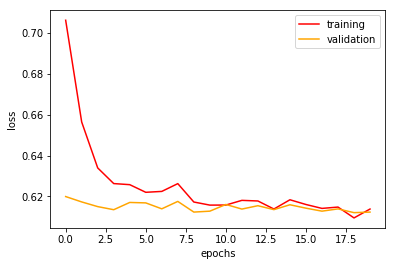

In [205]:
epochs = history.epoch
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')
plt.show()

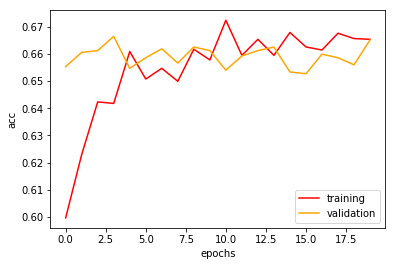

In [206]:
acc = history.history['acc']
validation_acc = history.history['val_acc']
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')
plt.show()


In [207]:
traing_loss, traing_acc = model.evaluate(x_train, y_train)
print ("greska na trening skupu")
print(traing_loss)
print("tacnost na trening skupu")
print(traing_acc)

5085/5085 [==============================] - 1s 223us/step
greska na trening skupu
0.6060742083200663
tacnost na trening skupu
0.6715830873950744


In [208]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("greska na test skupu")
print(test_loss)
print("tacnost na test skupu")
print(test_acc)

1312/1312 [==============================] - 0s 242us/step
greska na test skupu
0.6236709836052685
tacnost na test skupu
0.65625


In [210]:
f1 = metrics.f1_score(y_test, y_test_predicted)
f1

0.7245328511151297